# Principal Component Analysis

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

- **Principal Component Analysis**, or PCA. What it is, mathemtically and in code.
- How it works, with examples.
- The connection between SVD, the **Singular Value Decomposition**, and PCA.

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*


## Assigned Reading

For this worksheet you are recommended Chapters 4 and 10 of [MML],
Chapter 10 of [MLFCES], Chapter 5.3 of [IPDS], 

- MML: Mathematics for Machine Learning, by Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong.
  Cambridge University Press. <https://mml-book.github.io>.
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.
- IPDS: Introduction to Probability for Data Science, by Stanley H. Chan,
  <https://probability4datascience.com>

These can be accessed legally and without cost.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Context


We have seen these 

- Eigenvalue decomposition
- SVD, the **Singular Value Decomposition**

Let's review them...

## Eigen-systems of Symmetric Matrices

Given a real square $n$-row by $n$-column matrix,
$\boldsymbol{A}\in\mathbb{R}^{n\times n}$ the eigenvalue problem
is that of finding scalar eigenvalues $\lambda$
and $n$-dimensional eigenvectors $\boldsymbol{v}$ such that

$$
\boldsymbol{A}\boldsymbol{v}=\lambda\boldsymbol{v}    
\quad\Longrightarrow\quad
\boldsymbol{A}\boldsymbol{V}=\boldsymbol{V}\boldsymbol{D}  
\quad\Longrightarrow\quad
\boldsymbol{A} = 
\sum_{k=1}^n
\lambda_k\boldsymbol{v}_k\boldsymbol{v}_k^T.
$$

The eigensystem is **real**.

We have the *Spectral Theorem* - see [MML, Theorem 4.15]

> **Spectral Theorem (for matrices)**
> If $\boldsymbol{A}$ is real and symmetric then its eigenvalues are
> all real and its eigenvector matrix $\boldsymbol{V}$ can be taken
> as *orthogonal* so that $\boldsymbol{V}^{-1}=\boldsymbol{V}^T$.
Hence...

$$
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T  
$$


## The SVD: Singular Value Decomposition

Given a real $m$-row by $n$-column matrix, 
$\boldsymbol{B}\in\mathbb{R}^{m\times n}$

$$
\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
=\sum_{j=1}^{p} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$

where: for the left singular vectors: $\boldsymbol{U}\in\mathbb{R}^{m\times m}$;
for the singular values: $\boldsymbol{\Sigma}\in\mathbb{R}^{m\times n}$;
and, for the right singular vectors, $\boldsymbol{V}\in\mathbb{R}^{n\times n}$.
Here $p=\min\{m,n\}$.

Note that $\boldsymbol{\Sigma}=\text{diag}(\sigma_1,\ldots,\sigma_p) + \mathit{zeros}$,
and we can always arrange that $0 \le \sigma_p\le\cdots\le\sigma_1$.

As $\boldsymbol{B}$ is real,
$\boldsymbol{U}$ and $\boldsymbol{V}$ are real and *orthogonal*.

If $\sigma_r\ne 0$ and $\sigma_p= 0$ for all $p>r$ then
$r$ is the rank of $\boldsymbol{B}$.



## How are these factorizations connected?

On the face of it they are very different. the first applies only to 
square symmetric matrices, while the second applies also to
rectangular, and hence (why?) non-symmetric matrices.

But... Look at this... Given the SVD 
$\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$
we have,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \Big(\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\Big)^T
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

and remembering that, in general,
$(\boldsymbol{K}\boldsymbol{L})^T = \boldsymbol{L}^T\boldsymbol{K}^T$
(this could be called *taking the transpose through*), we can write,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
$$
because $\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}$ (orthogonal).

Similarly, because also
$\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}$ (orthogonal),

$$
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
\Big(\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\Big)^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

Do you recognise these?

We have just shown that,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{ and }\qquad
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

Familiar? Think about $\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T$.

- Put $\boldsymbol{A} = \boldsymbol{B}^T\boldsymbol{B}$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}^T\boldsymbol{\Sigma}$. Then,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T.
$$

- Put $\boldsymbol{A} = \boldsymbol{B}\boldsymbol{B}^T$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}\boldsymbol{\Sigma}^T$. Then,

$$
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{U}\boldsymbol{D}\boldsymbol{U}^T.
$$

- $\boldsymbol{V}$, the right singular vectors in the SVD are the eigenvectors of 
$\boldsymbol{B}^T\boldsymbol{B}$.

- $\boldsymbol{U}$, the left singular vectors in the SVD are the eigenvectors of 
$\boldsymbol{B}\boldsymbol{B}^T$.

- In both cases $\boldsymbol{\Sigma}$ contains the positive square
roots of the eigenvalues of $\boldsymbol{B}^T\boldsymbol{B}$
and $\boldsymbol{B}\boldsymbol{B}^T$.

- **NOTE:** $\boldsymbol{B}^T\boldsymbol{B}$ and $\boldsymbol{B}\boldsymbol{B}^T$
have the same non-zero eigenvalues (same rank).


## Why does this matter?
 
Our data, $\boldsymbol{X}$, is organized into rows of feature values with one observation per row 
and one feature per column. We write this as

$$
\boldsymbol{X} = \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_D
\Big)
$$

If $D=3$ (four features)...

... we recall that the **covariance matrix** takes this form:

$$
\boldsymbol{S} = 
\left(\begin{array}{llll}
\mathrm{Var}(X_0)  &  \mathrm{Cov}(X_0,X_1)  &  \mathrm{Cov}(X_0,X_2)  &  \mathrm{Cov}(X_0,X_3) \\
\mathrm{Cov}(X_1,X_0)  &  \mathrm{Var}(X_1)  &  \mathrm{Cov}(X_1,X_2)  &  \mathrm{Cov}(X_1,X_3) \\
\mathrm{Cov}(X_2,X_0)  &  \mathrm{Cov}(X_2,X_1)  &  \mathrm{Var}(X_2)  &  \mathrm{Cov}(X_2,X_3) \\
\mathrm{Cov}(X_3,X_0)  &  \mathrm{Cov}(X_3,X_1)  &  \mathrm{Cov}(X_3,X_2)  &  \mathrm{Var}(X_3) \\
\end{array}\right)
$$

because $\mathrm{Cov}(X,X)=\mathrm{Var}(X)$. Since $\mathrm{Cov}(X,Y)=\mathrm{Cov}(Y,X)$, this matrix is **symmetric**
and so has real eigenvalues.

We have seen that if the data are already centred then,

$$
(N-1)\boldsymbol{S} = 
\left(\begin{array}{llll}
\boldsymbol{X}_0\cdot\boldsymbol{X}_0 & \boldsymbol{X}_0\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_0\cdot\boldsymbol{X}_2 & \boldsymbol{X}_0\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_1\cdot\boldsymbol{X}_0 & \boldsymbol{X}_1\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_1\cdot\boldsymbol{X}_2 & \boldsymbol{X}_1\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_2\cdot\boldsymbol{X}_0 & \boldsymbol{X}_2\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_2\cdot\boldsymbol{X}_2 & \boldsymbol{X}_2\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_3\cdot\boldsymbol{X}_0 & \boldsymbol{X}_3\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_3\cdot\boldsymbol{X}_2 & \boldsymbol{X}_3\cdot\boldsymbol{X}_3
\\
\end{array}\right)
=
\left(\begin{array}{l}
\boldsymbol{X}_0^T
\\
\boldsymbol{X}_1^T
\\
\boldsymbol{X}_2^T
\\
\boldsymbol{X}_3^T
\\
\end{array}\right)
\left(\begin{array}{llll}
\boldsymbol{X}_0
&
\boldsymbol{X}_1
&
\boldsymbol{X}_2
&
\boldsymbol{X}_3
\\
\end{array}\right)
$$

and, hence (in general), the (sample) covariance matrix for $N$ observations is

$$
\boldsymbol{S} = 
\frac{1}{(N-1)}\boldsymbol{X}^T\boldsymbol{X}.
$$


## Terminology

We just introduced the **sample** covariance matrix:

$$
\boldsymbol{S} = 
\frac{1}{(N-1)}\boldsymbol{X}^T\boldsymbol{X}.
$$

The $N-1$ in the denominator makes this an **unbiased** estimate of the 
population statistics. When $N$ is large we can just work with 

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
$$

and call it the **empirical** covariance matrix.

This terminology is discussed in [MML, Section 6.4.2]. 


## Conventions

We have now adopted a convention that our data matrix $\boldsymbol{X}$ has 
features varying along the rows, and observations varying down the columns
so that:

$$
\boldsymbol{X} = \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_D
\Big)
$$

gives a data set with $D$ features. The length (they must all be the same)
of the column vectors 
$\boldsymbol{X}_1,\ \boldsymbol{X}_2,\ \ldots,\ \boldsymbol{X}_D$
tell us how many observations there are. We've been denoting this
by $N$.

>**HOWEVER**: in some sources this convention is transposed. The different
features occupy their own rows of the matrix,
with the observations recorded along the rows. 

This is the case in [MML]. It means that

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
\qquad\text{for us, becomes}\qquad
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}\boldsymbol{X}^T
\qquad\text{for them}
$$

because our $\boldsymbol{X}$ is their $\boldsymbol{X}^T$.

**BE CAREFUL: this is not uncommon**

## Features and Observations

Let's say there are $D$ features (columns) in our data set
$\boldsymbol{X}$ and $N$ observations (rows).

An observation takes the form $\boldsymbol{x}_j = (x_1, x_2, \ldots, x_d)^T$,
a **column vector**, for $j=1,2,\ldots,N$.

Hence,

$$
\boldsymbol{X}
= \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_D
\Big)
= \Big(
\boldsymbol{x}_0, \boldsymbol{x}_1, \cdots, \boldsymbol{x}_N
\Big)^T
$$

Note: we are using **upper case** $\boldsymbol{X}_k$ for a column
vector of observations of a feature (in the column indexed by $k$),
and **lower case**, $\boldsymbol{x}_j$, for a feature vector
arising from a single observation (in the row indexed by $j$). 

We only use column vectors in these notes.



## PCA - Principal Component Analysis

The main idea and motivation behind this is that high dimensional data
often lives very close to a lower dimensional subspace.

A typical and often used example of this is that in Figure 10.1 of [MML, Chap. 10].

We can see that here: <https://mml-book.github.io>.

PCA will analyze a data set and determine the direction in which
most variation occurs. If we are to approximate using a lower dimesional space
then this is a good direction (subspace component) to start with.

Technically, PCA determines directions which maximize variance.

Let's go through this slowly - it can be quite confusing.

## PCA - outline algorithm.

- Take our $D$-column by $N$-row data set $\boldsymbol{X}$
and ensure that the column means are zero.

- This is referred to as **centering the data**.

- It means that $\mathbb{E}(\boldsymbol{X}_d)=0$ for
columns $d=0,1,2,\ldots,D-1$.

- We want a $D$-row by $M$-column matrix
$\boldsymbol{B}\in\mathbb{R}^{D,M}$, called the **code** in [MML],
such that we can define $\boldsymbol{Z}$ as follows:

$$
\boldsymbol{Z} = \boldsymbol{X}\boldsymbol{B}\boldsymbol{B}^T
$$

- If $M=D$ we insist that $\boldsymbol{Z}=\boldsymbol{X}$. Otherwise
we have $M<D$ and $\boldsymbol{Z}$ is an approximation (a projection)
of $\boldsymbol{X}$ in a lower dimensional subspace.

- We determine $\boldsymbol{B}$ by minimizing the reconstruction
error:

$$
\mathscr{J} = \frac{1}{N}\sum_{n=1}^N
\Vert\boldsymbol{x}_n-\boldsymbol{z}_n\Vert_2^2
$$

where $\boldsymbol{z}_n$ is the $n$-th row of $\boldsymbol{Z}$.

# Some Technicalities

> **THINK ABOUT**: If $\boldsymbol{X} = \boldsymbol{X}\boldsymbol{B}\boldsymbol{B}^T$
when $M=D$ then $\boldsymbol{B}\boldsymbol{B}^T=\boldsymbol{I}_D$. Is
$\boldsymbol{B}$ square?

> **THINK ABOUT**: If $\boldsymbol{Z} = \boldsymbol{X}\boldsymbol{B}\boldsymbol{B}^T$
when $M<D$ then what shape is $\boldsymbol{Z}$? Is it the same shape as 
$\boldsymbol{X}$?

> **THINK ABOUT**: If we set 
$\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{B}$ then 
$\boldsymbol{Z} = \boldsymbol{Y}\boldsymbol{B}^T$. What shape is 
$\boldsymbol{Y}$?

> **THINK ABOUT**: $\boldsymbol{Y}$ will be $N$-rows by $M$-columns.
$\boldsymbol{Y}$ is **smaller** than $\boldsymbol{X}$ if $M<D$ and
represents dimensionality reduction. 

> **THINK ABOUT**: the reduction $\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{B}$,
and the subsequent enlargement $\boldsymbol{Z} = \boldsymbol{Y}\boldsymbol{B}^T$
is the basis of an **autoencoder**. $\boldsymbol{Z}$ is a
reconstruction of $\boldsymbol{X}$ resulting from a data compression step.



This minimization referred to above is a long technical excursion in
multivariable calculus. The important result of it is that we need to
find the eigensystem of the empirical data covariance matrix,

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}.
$$

This means we want to solve

$$
\boldsymbol{S}\boldsymbol{v} = \lambda\boldsymbol{v}
$$

for the eigenpairs
$(\lambda_1, \boldsymbol{v}_1),\ (\lambda_2, \boldsymbol{v}_2),\ \ldots$

Then $\boldsymbol{B} = (\boldsymbol{v}_1, \boldsymbol{v}_2, \ldots, \boldsymbol{v}_M)$
and the eigenvalues tell us how much variance of the original data set is captured
by the $M$-dimensional projection.

Let's see this in action...

## Worked example

Consider this set of data (already centered),

$$
\boldsymbol{X} = \left(\begin{array}{rr}
1 & 2 \\ 2 & 1 \\ -2 & -1 \\ -1 & -2
\end{array}\right)
\quad\Longrightarrow\quad
\boldsymbol{S}
= \frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
= \frac{1}{4}\left(\begin{array}{rr}
10 & 8 \\ 8 & 10
\end{array}\right)
$$

The eigensystem,
with $\boldsymbol{S}\boldsymbol{V} = \boldsymbol{V}\boldsymbol{D}$,
is 

$$
\boldsymbol{V} = \frac{1}{\sqrt{2}}
\left(\begin{array}{rr}
1 & -1 \\ 1 & 1
\end{array}\right)
=
\left(\begin{array}{rr}
\boldsymbol{v}_0 & \boldsymbol{v}_1
\end{array}\right)
\quad\text{ and }\quad
\boldsymbol{D}
=
\frac{1}{2}\left(\begin{array}{rr}
9 & 0 \\ 0 & 1
\end{array}\right)
=
\left(\begin{array}{rr}
\lambda_0 & 0 \\ 0 & \lambda_1
\end{array}\right).
$$

Let's see this in python...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# set up the feature matrix and check the column means are zero
D=2; N=4
X = np.array([[1, 2], [2, 1], [-2, -1], [-1, -2]])
print(f'Column means: col 1, {X[:,0].mean()} and col 2, {X[:,0].mean()}')
# and the empirical covariance matrix
S = 1/N*X.T @ X
print('S = \n',S)
# solve the eigenvalue problem
lmda, V = np.linalg.eig(S)
print('evals = ', lmda)
print('evecs = \n', V)

Column means: col 1, 0.0 and col 2, 0.0
S = 
 [[2.5 2. ]
 [2.  2.5]]
evals =  [4.5 0.5]
evecs = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


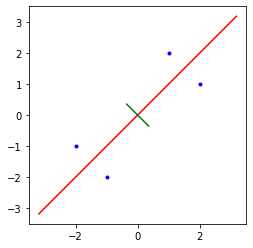

In [2]:
# a picture will tell us much more...
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
# plot the data in blue
plt.plot(X[:,0], X[:,1], '.', color='b')
# plot the eigenvectors...
# the first in red from -v0 to +v0 with length 2*lambda_0
x0 = lmda[0]*V[0,[0]]; y0 = lmda[0]*V[1,[0]]
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
# the second in green from -v1 to +v1 with length 2*lambda_1
x1 = lmda[1]*V[0,[1]]; y1 = lmda[1]*V[1,[1]]
plt.plot([-x1,x1],[-y1,y1],'-', color='g')

We see that the direction of maximum variance is given by the
dominant eigenpair. The next eigenpair is **orthogonal**.


Now, we know that $\boldsymbol{V}$ is an orthogonal matrix, so that
$\boldsymbol{V}\boldsymbol{V}^T = \boldsymbol{I}$.

It is therefore clear that 
$\boldsymbol{X}=\boldsymbol{X}\boldsymbol{V}\boldsymbol{V}^T$.
Now, with $\boldsymbol{V}=(\boldsymbol{v}_0, \boldsymbol{v}_1)$,
we observe that

$$
\boldsymbol{Z}_0
=\boldsymbol{X}\boldsymbol{v}_0\boldsymbol{v}_0^T
= \frac{3}{2}\left(\begin{array}{rr}
1 & 1 \\ 1 & 1 \\ -1 & -1 \\ -1 & -1
\end{array}\right)
\quad\text{and}\quad
\boldsymbol{Z}_1
=\boldsymbol{X}\boldsymbol{v}_1\boldsymbol{v}_1^T
= \frac{1}{2}\left(\begin{array}{rr}
-1 & 1 \\ 1 & -1 \\ -1 & 1 \\ 1 & -1
\end{array}\right)
$$

The rows give us the projections of the original rows (features)
onto the lower dimensional subspaces.

Let's see it in code, and then in pictures (building on the picture above)...

In [3]:
print('X - X V V.T = \n', X - X @ V @ V.T )

v0 = V[:,[0]]; Z0 = X @ v0 @ v0.T
print('X @ v0 @ v0.T = \n', Z0)

v1 = V[:,[1]]; Z1 = X @ v1 @ v1.T
print('X @ v1 @ v1.T = \n', Z1)

X - X V V.T = 
 [[ 1.11022302e-16  2.22044605e-16]
 [ 4.44089210e-16  2.22044605e-16]
 [-4.44089210e-16 -2.22044605e-16]
 [-1.11022302e-16 -2.22044605e-16]]
X @ v0 @ v0.T = 
 [[ 1.5  1.5]
 [ 1.5  1.5]
 [-1.5 -1.5]
 [-1.5 -1.5]]
X @ v1 @ v1.T = 
 [[-0.5  0.5]
 [ 0.5 -0.5]
 [-0.5  0.5]
 [ 0.5 -0.5]]


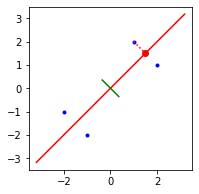

In [4]:
plt.figure(figsize=(3,3)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
# just the first row of Z0 for the moment
plt.plot([X[0,0], Z0[0,0]], [X[0,1], Z0[1,1]], ':', marker='o', color='r', markevery=[1])

In the first row of $\boldsymbol{Z}_0 =\boldsymbol{X}\boldsymbol{v}_0\boldsymbol{v}_0^T$,
the original point at $(1,2)$ is projected to the new point $(1.5,1.5)$
on the dominant lower dimensional subspace. What about 
$\boldsymbol{Z}_1 =\boldsymbol{X}\boldsymbol{v}_1\boldsymbol{v}_1^T$?

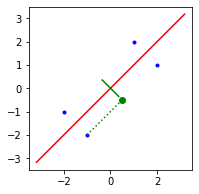

In [5]:
plt.figure(figsize=(3,3)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
# just the last row of Z1 for the moment
plt.plot([X[3,0], Z1[3,0]], [X[3,1], Z1[3,1]], ':', marker='o', color='g', markevery=[1])

Now in the last row of $\boldsymbol{Z}_1 =\boldsymbol{X}\boldsymbol{v}_1\boldsymbol{v}_1^T$,
the original point at $(-1,-2)$ is projected to the new point $(0.5,-0.5)$
on the next-dominant lower dimensional subspace.

Let's see all the projections in one picture.

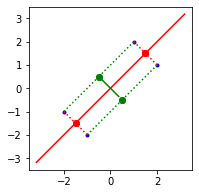

In [6]:
plt.figure(figsize=(3,3)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
for k in range(4):
  plt.plot([X[k,0], Z0[k,0]], [X[k,1], Z0[k,1]], ':', marker='o', color='r', markevery=[1])
  plt.plot([X[k,0], Z1[k,0]], [X[k,1], Z1[k,1]], ':', marker='o', color='g', markevery=[1])

## The Local Coordinate System

If we treat the eigenvectors as subspaces then the length along each eigenvector is the local coordinate in that subspace. How can we get these coordinates? Well, look at this:

$$
\boldsymbol{X} = \left(\begin{array}{rr}
1 & 2 \\ 2 & 1 \\ -2 & -1 \\ -1 & -2
\end{array}\right)
\quad\Longrightarrow\quad
\boldsymbol{X}\boldsymbol{v}_0
=\frac{1}{\sqrt{2}}\left(\begin{array}{r} 3 \\ 3 \\ -3 \\ -3 \end{array}\right)
\quad\text{and}\quad
\boldsymbol{X}\boldsymbol{v}_1
=\frac{1}{\sqrt{2}}\left(\begin{array}{r} 1 \\ -1 \\ 1 \\ -1 \end{array}\right).
$$

These tell us that the first two points (rows) in $\boldsymbol{X}$ 
project to coincident points a distance $\frac{3}{\sqrt{2}}$ along
the dominant eigenvector, and that the second two points 
project to coincident points a distance $\frac{-3}{\sqrt{2}}$ along
the dominant eigenvector.

On the other hand, the first and third points project to distances 
$\frac{1}{\sqrt{2}}$ along the second eigenvector, while the second
and fourth project to distances $\frac{-1}{\sqrt{2}}$.

Here is some code to illustrate this...

In [7]:
Xv0 = X @ v0
Xv1 = X @ v1
# multiply by root 2 to tidy up the output
print('sqrt(2) X v0 = \n', np.sqrt(2) * Xv0)
print('sqrt(2) X v1 = \n', np.sqrt(2) * Xv1)

sqrt(2) X v0 = 
 [[ 3.]
 [ 3.]
 [-3.]
 [-3.]]
sqrt(2) X v1 = 
 [[ 1.]
 [-1.]
 [ 1.]
 [-1.]]


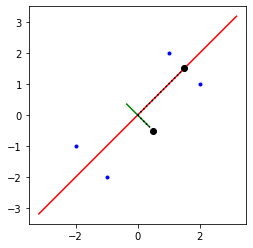

In [8]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
cos45 = sin45 = 1/np.sqrt(2)
# for data point 0 along v0
plt.plot([0, Xv0[0,0]*cos45], [0, Xv0[0,0]*sin45], ':', marker='o', color='k', markevery=[1])
# for data point 3 along v1
plt.plot([0, -Xv1[3,0]*cos45], [0, Xv1[3,0]*sin45], ':', marker='o', color='k', markevery=[1])

## Explained Variance

There is yet more to see... The column-wise variances in the orignal data set,

$$
\boldsymbol{X} = \left(\begin{array}{rr}
1 & 2 \\ 2 & 1 \\ -2 & -1 \\ -1 & -2
\end{array}\right)
$$

are 

$$
\left\{\begin{array}{rrrr}
\mathrm{Var}(\boldsymbol{X}_0)
& = \mathbb{E}(\boldsymbol{X}_0\cdot\boldsymbol{X}_0)
& = \frac{1}{4}\big(1+2^2+(-2)^2+1\big) & = \frac{5}{2},
\\\ \\
\mathrm{Var}(\boldsymbol{X}_1)
& = \mathbb{E}(\boldsymbol{X}_1\cdot\boldsymbol{X}_1)
& = \frac{1}{4}\big(2^2+1+1+(-2)^2\big) & = \frac{5}{2}
\end{array}\right.
$$

and the total variance in the data set is $\frac{5}{2}+\frac{5}{2}=5$ (Note - 
this isn't what you get by stacking the data and taking a single variance because
the mean(s) may get altered).

The sum of the individual feature variances is
$\frac{5}{2}+\frac{5}{2}=5$.

In PCA, each eigenvalue gives the variance in the direction of its eigenvector.

Our eigenvalues were $\lambda_0 = \frac{9}{2}$ and $\lambda_1 = \frac{1}{2}$. The
total variance is therefore $\frac{9}{2}+\frac{1}{2}=5$.

> **THINK ABOUT**: the trace of a matrix is the sum of its eigenvalues. Relevance?

We talk about each eigenvalue **explaining** variance in the original data set.

Here the first eigenvalue explains $\frac{9}{2}\div 5 =90\%$ of the 
original variance. The remaining $5\%$ is in the orthogonal direction
of the second eigenvector.

## The connection to SVD

We just performed PCA using an eigenvalue analysis of the empirical
covariance matrix

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
\quad\text{leading to}\quad
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{v}
=\lambda\boldsymbol{v}.
$$

Earlier, given the SVD 
$\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$,
we saw that putting
$\boldsymbol{A} = \boldsymbol{B}^T\boldsymbol{B}$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}^T\boldsymbol{\Sigma}$ led to

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{becoming}\qquad
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T.
$$

Therefore, for PCA we could also obtain the SVD of $\boldsymbol{X}$ and
use the right singular vectors. The eigenvalues will be the squares of
the singular values divided by $N$.

Let's check this:

In [9]:
# re-solve the eigenvalue problem
lmda, V = np.linalg.eig(S)
print(f'evals = {lmda} and V = ')
print(V)
# take the SVD of X
U, Sig, VT = np.linalg.svd(X)
print(f'singular values Sigma = {Sig}')
print(f'Sigma^2/N = {Sig*Sig/N} and V = ')
print(VT.T)

evals = [4.5 0.5] and V = 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
singular values Sigma = [4.24264069 1.41421356]
Sigma^2/N = [4.5 0.5] and V = 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Let's see how to do PCA with `sklearn`...

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print('Here is the explained variance as ratios...')
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'Here are the singular values = {pca.singular_values_}')
print('the eigenvalues are squares of the singular values divided by N')
print(f'eigenvalues = {pca.singular_values_**2/N}')

Here is the explained variance as ratios...
XV ratio = [0.9 0.1]
Here are the singular values = [4.24264069 1.41421356]
the eigenvalues are squares of the singular values divided by N
eigenvalues = [4.5 0.5]


The principal components can be compared with the
eigenvectors from above.

Beware: they are given to us in **rows**.

In [11]:
# the principal components are stored as row vectors, so transpose
B = pca.components_.T
print('Principal Components (transposed) B = \n', B)
print('Compare with our earlier V = \n', V)

Principal Components (transposed) B = 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Compare with our earlier V = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Do you remember that above we used $\boldsymbol{X}\boldsymbol{v}_0$
and $\boldsymbol{X}\boldsymbol{v}_1$ to get the positions (lengths)
along the principal axes of the projected data points?

`sklearn` can do this for us:

In [12]:
# multiply by sqrt(2) to tidy the output.
Xf = pca.fit_transform(X)
print('np.sqrt(2)*Xf = \n', np.sqrt(2)*Xf)

np.sqrt(2)*Xf = 
 [[ 3. -1.]
 [ 3.  1.]
 [-3. -1.]
 [-3.  1.]]


Technically, the principal components give us a new **basis** for the 
data space. These **transformed** coordinates gives us the coordinates
of the data in the new basis. Let's see this in pictures...

Here are the original data points in the original feature basis.
This is where each axis is labelled with the feature name.

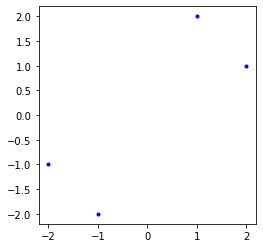

In [13]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')

Here are the data points in the PCA basis.

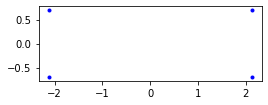

In [14]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(Xf[:,0], Xf[:,1], '.', color='b')

- It is immediately apparent that the data has become more *one dimensional*.

- An issue though is that the axes are no longer easily interpreted.

- This is relevant to the **explainability agenda** in AI and Data Science.

## Reflection

That was a long journey - and we didn't even derive the results, we just quoted
and illustrated them. This, again, is because we are doing *just enough*
to make *progress at pace*.

We're now going to embark on a much more realistic (well, in 2D at least)
example of how this works. We'll go faster because all the work has been done.

## Standard Example

The following example is used a lot in account of PCA. 

The idea is to generate and plot a lozenge of Gaussian distributed data.
It will have unequal variances (otherwise it would be a circle). 

In [15]:
# generate this number of sample points
Ns=50 
# The Gaussian lozenge will be centered with non-unit covariance
mean = [0, 0]
cov = [[30, 15], [15, 15]]
# generate Ns random points (x,y)
x, y = np.random.multivariate_normal(mean, cov, Ns).T
# reshape them to columns and stack them next to each other 
X = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
# We can see it if the data matrix is small - otherwise little point
if Ns < 8: print(X)

In [16]:
# let's look at the empirical column means - they wont be exactly zero 
print(f'Column means 1, {X[:,0].mean()} and 2, {X[:,1].mean()}')
# so let's center this sample data
X[:,0] -= X[:,0].mean()
X[:,1] -= X[:,1].mean()
print(f'Centered column means 1, {X[:,0].mean()} and 2, {X[:,1].mean()}')

Column means 1, -0.780049323709285 and 2, 0.47783968065722177
Centered column means 1, -1.0658141036401502e-16 and 2, -1.7763568394002505e-17


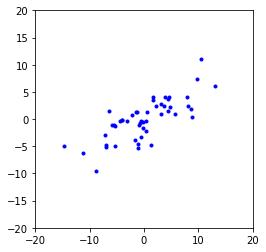

In [17]:
# let's plot our data set
plt.figure(figsize=(4,4))
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')

In [18]:
# perform the PCA
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors, so transpose
V = pca.components_.T
print('V = \n', V)

XV ratio = [0.9031955 0.0968045]
sing vals = [45.94644478 15.04211185]
V = 
 [[-0.86512851  0.50155026]
 [-0.50155026 -0.86512851]]


In [19]:
# project X to the singular components
Z1 = X @ V[:,[0]] @ V[:,[0]].T
Z2 = X @ V[:,[1]] @ V[:,[1]].T

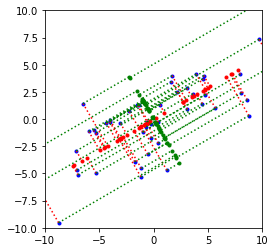

In [20]:
# re-plot, and include all the projected data
plt.figure(figsize=(4,4))
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
# plot the projections - these illustrate the directions
plt.plot(Z1[:,0], Z1[:,1], '.', color='r')
plt.plot(Z2[:,0], Z2[:,1], '.', color='g')
# Now loop over each point and dot-line the projection onto v0 and v1
for k in range(Ns):
  plt.plot([X[k,0], Z1[k,0]], [X[k,1],Z1[k,1]], ':', color='r')
  plt.plot([X[k,0], Z2[k,0]], [X[k,1],Z2[k,1]], ':', color='g')
# zoom in or out with this...
window=10; plt.xlim(-window,window); plt.ylim(-window,window); plt.show()

In [21]:
# Let's see what the data looks like in the new coordinate system
Xf = pca.fit_transform(X)

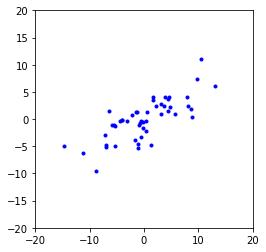

In [22]:
# here is the original...
plt.figure(figsize=(4,4))
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')

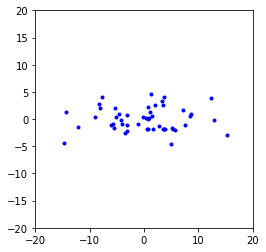

In [23]:
# here is the transformed data
plt.figure(figsize=(4,4))
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal')
plt.plot(Xf[:,0], Xf[:,1], '.', color='b')

### Review

We covered *just enough*, to make *progress at pace*. We looked at

- How the SVD and eigenvalue decomposition are related.
- How this becomes relevant to the data covariance matrix.
- PCA and its use in variance maximization.

Now we can start putting all of this material to work.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 10_pca.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [ ]:
%%bash
NBROOTNAME=10_pca
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi